In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Load and show the image

1. Read the image _bloodcells_

In [9]:
image = cv2.imread("BLOODCELLS.bmp", 0)

2. Transform the image into a binary image BW using a thresholding process or a dedicated function

The function used here is `threshold` from the openCV library, it takes as parameters the image, the threshold, the maximum value, and the thresholding type.

In [10]:
image_bw = 255-cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)[1]

3. Show the two images with titles within the same figure

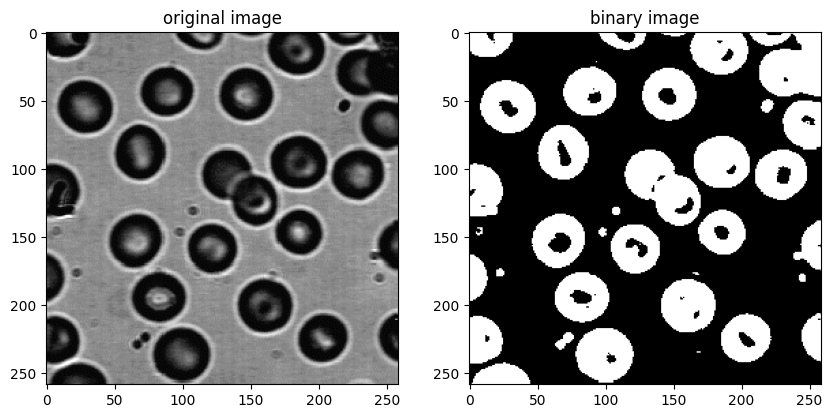

In [11]:
figure = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("original image")
plt.subplot(1,2,2)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.show()

6. What do you observe on the image? What’s the solution of this problem?

There are a lot of smaller objects that would need to be removed to have an accurate count of the bloodcells. The solution is to apply the erosion or dilation, or both operator on the image.

## Erosion

5. Open and study the help page of the function imerode of Matlab.

The _imerode_ function of Matlab performs erosion on grayscale images using a sctructuring element which is kernel or a matrix that traveses the image. An equivalent function in OpenCV is the `cv2.erode` function.

6. Choose your appropriate structuring element SE (shape and size) and justify your choice.

The kernel chosen is 5x5 in order to erode the small objects and ellipse shaped because the small objects and the cells are ellipse shaped. 

In [12]:
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

7. Apply the erosion operator on the binary image BW.

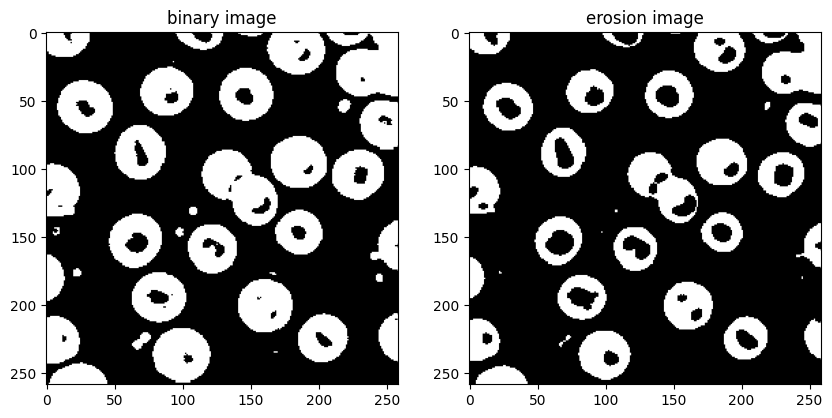

In [13]:
erosion = cv2.erode(image_bw, strel, iterations=1)
figure = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.subplot(1,2,2)
plt.imshow(erosion, cmap="gray")
plt.title("erosion image")
plt.show()

8. Repeat the operation with different sizes of the SE (3 different sizes)

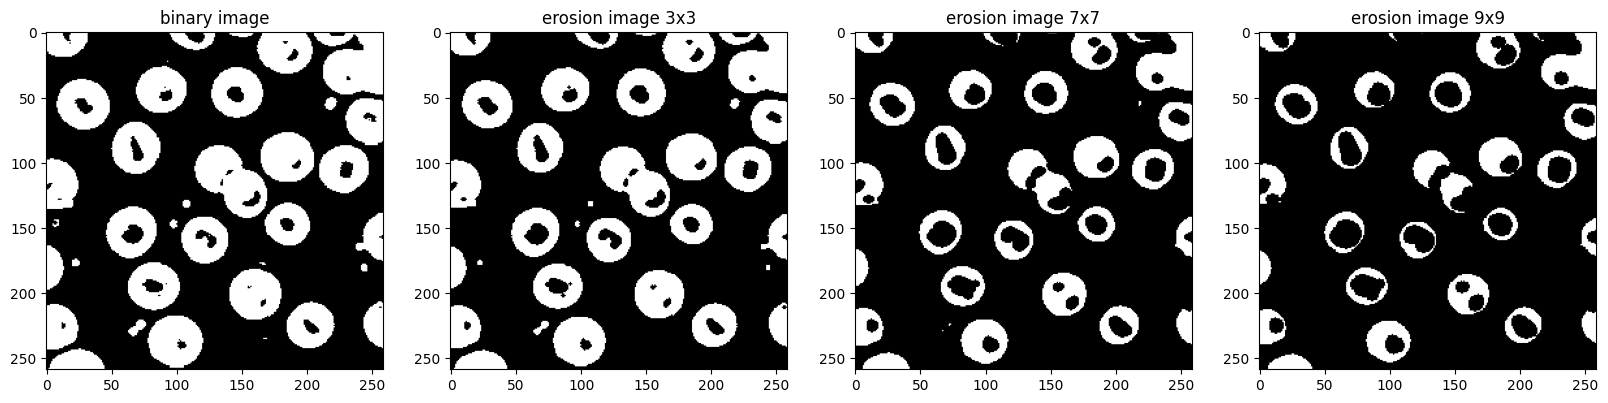

In [14]:
strel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
erosion_3x3 = cv2.erode(image_bw, strel_3x3)

strel_7x7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
erosion_7x7 = cv2.erode(image_bw, strel_7x7)

strel_9x9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
erosion_9x9 = cv2.erode(image_bw, strel_9x9)

figure = plt.figure(figsize=(20,40))

plt.subplot(1,4,1)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.subplot(1,4,2)
plt.imshow(erosion_3x3, cmap="gray")
plt.title("erosion image 3x3")
plt.subplot(1,4,3)
plt.imshow(erosion_7x7, cmap="gray")
plt.title("erosion image 7x7")
plt.subplot(1,4,4)
plt.imshow(erosion_9x9, cmap="gray")
plt.title("erosion image 9x9")
plt.show()

## Dilation

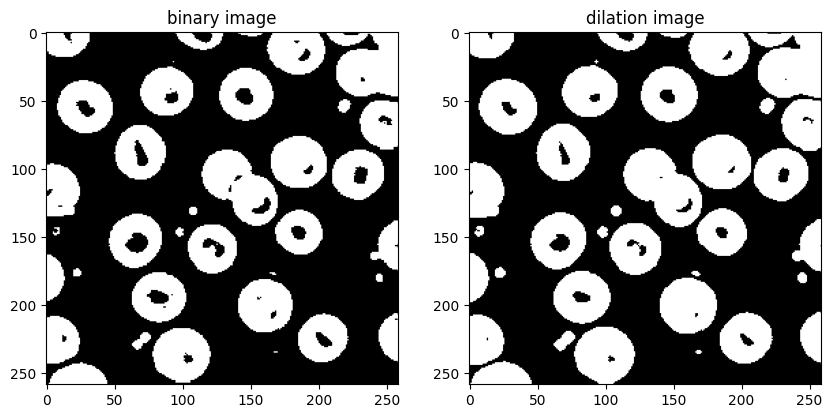

In [15]:
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilation = cv2.dilate(image_bw, strel)
figure = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.subplot(1,2,2)
plt.imshow(dilation, cmap="gray")
plt.title("dilation image")
plt.show()

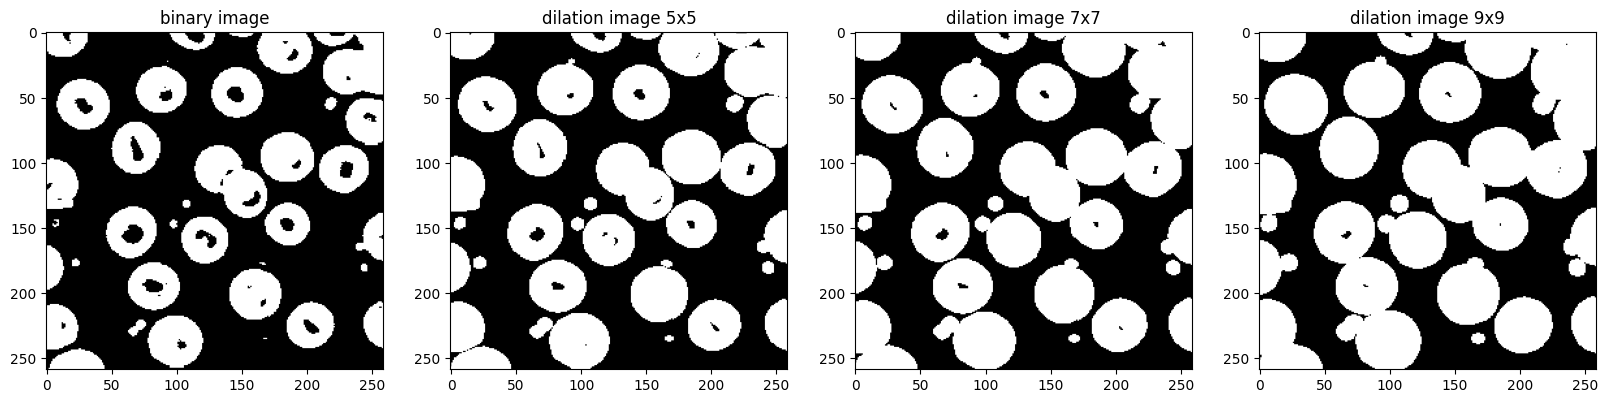

In [16]:
strel_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dilation_5x5 = cv2.dilate(image_bw, strel_5x5)

strel_7x7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dilation_7x7 = cv2.dilate(image_bw, strel_7x7)

strel_9x9 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
dilation_9x9 = cv2.dilate(image_bw, strel_9x9)

figure = plt.figure(figsize=(20,40))

plt.subplot(1,4,1)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.subplot(1,4,2)
plt.imshow(dilation_5x5, cmap="gray")
plt.title("dilation image 5x5")
plt.subplot(1,4,3)
plt.imshow(dilation_7x7, cmap="gray")
plt.title("dilation image 7x7")
plt.subplot(1,4,4)
plt.imshow(dilation_9x9, cmap="gray")
plt.title("dilation image 9x9")
plt.show()

## Improvements

7. Are erosion and dilation operators sufficient to extract all the cells with 
a good precision? Which  solution do  you  propose to  improve  the 
segmentation results?

Erosion and dilation operators alone are not sufficient to extract all the cells with a good precision. The solution is to use morphological opening (erosion followed by dilation), this will split apart joint objects and removes small objects while keeping the shape and size of the foreground object (blood cells in our example) 

8. Give a solution and test it on your image

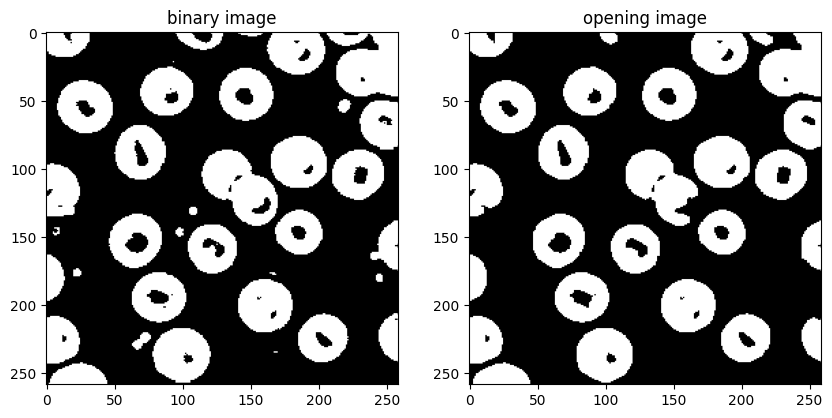

In [17]:
strel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(image_bw, cv2.MORPH_OPEN, strel, iterations=2)

figure = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(image_bw, cmap="gray")
plt.title("binary image")
plt.subplot(1,2,2)
plt.imshow(opening, cmap="gray")
plt.title("opening image")
plt.show()

## Labelization and counting

9. Open and study the help page of the bwlabel function of Matlab

The _bwlabel_ function of Matlab numbers all of the object in a given binary image.
OpenCV provides a similar function called `cv2.connectedComponentsWithStats`.

10. Use  this  function  to  label  the  segmented  objects  obtained  after  the 
enhancement step

In [18]:
analysis = cv2.connectedComponentsWithStats(opening, 8, cv2.CV_32S)
(totalLabels, label_ids, values, centroid) = analysis
output = np.zeros(opening.shape, dtype="uint8")

After the analysis, the function returns 4 values: 
- __totalLabels__: the number of labels (objects)
- __label_ids__: a matrix the size of the input image where each element has a value equal to its label
- __values__: contains stats relative to the labels. We can use them to draw bounding boxes around objects.
- __centroids__: a matrix with the x and y locations of each centroid

11. How many cells did you obtain?

In [19]:
print("number of cells", totalLabels)

number of cells 27


12. Show the labeled cells using different colors 

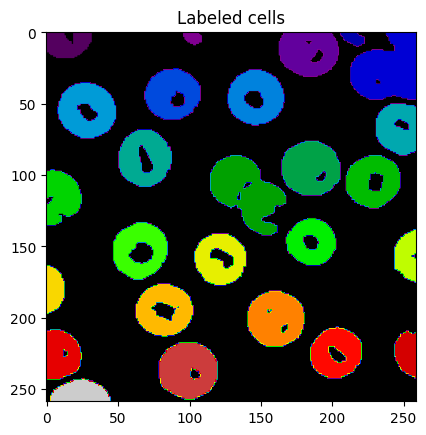

In [22]:
plt.imshow(label_ids, cmap="nipy_spectral")
plt.title("Labeled cells")
plt.show()

13. Open and study the help page of the _regionprops_ function of Matlab

This function measures the properties of objects in binary images. For our purposes using OpenCV, we can use the stats returned by the `cv2.connectedComponentsWithStats`

14. Use this function to perform some measurements on one or more objects

In [61]:
for i in range(1, totalLabels):
   
    # Area of the component
    area = values[i, cv2.CC_STAT_AREA]
     
    # Create a new image for bounding boxes
    new_img=image.copy()
        
    # Extract the coordinate points
    x1 = values[i, cv2.CC_STAT_LEFT]
    y1 = values[i, cv2.CC_STAT_TOP]
    w = values[i, cv2.CC_STAT_WIDTH]
    h = values[i, cv2.CC_STAT_HEIGHT]
        
    # Coordinate of the bounding box
    pt1 = (x1, y1)
    pt2 = (x1+ w, y1+ h)
    (X, Y) = centroid[i]
        
    # Bounding boxes for each component
    cv2.rectangle(new_img,pt1,pt2,
                    (0, 255, 0), 3)
    cv2.circle(new_img, (int(X),
                            int(Y)),
                4, (0, 0, 255), -1)

    # Create a new array to show individual component
    component = np.zeros(image_bw.shape, dtype="uint8")
    componentMask = (label_ids == i).astype("uint8") * 255

    # Apply the mask using the bitwise operator
    component = cv2.bitwise_or(component,componentMask)
    output = cv2.bitwise_or(output, componentMask)
        
    # Show the final images
    cv2.imshow("Image", new_img)
    cv2.imshow("Individual Component", component)
    cv2.imshow("Filtered Components", output)
    cv2.waitKey(0)

Running the above cell loops through each label and display some stats. 

It prompts three windows: 
- __Image__ shows the original grayscale image with the current label boxed and its centroid displayed.
- __Individual Component__ shows a single object at a time alone in its appropriate coordinates.
- __Filtered Components__ progressively displays all the objects as they are looped through. 

![](1.png)

![](2.png)

![](3.png)

![](4.png)


15. Show in one figure the largest cell and on another figure the smallest one. 

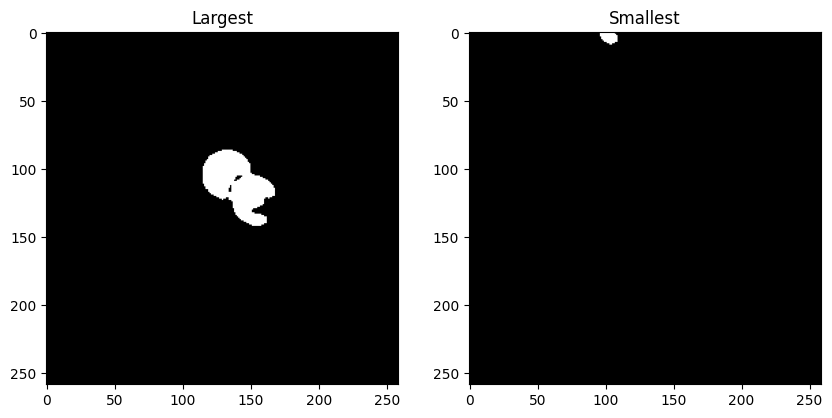

In [62]:
# Get areas of all objects
areas = [values[i, cv2.CC_STAT_AREA] for i in range(1, totalLabels)]

# Get index for smallest and for largest
smallest_id = areas.index(min(areas))
largest_id = areas.index(max(areas))

# Get largest and smallest blood cells
largest = get_component(largest_id)
smallest = get_component(smallest_id)

figure = plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(largest, cmap="gray")
plt.title("Largest")
plt.subplot(1,2,2)
plt.imshow(smallest, cmap="gray")
plt.title("Smallest")
plt.show()
